Credit Card Customer Segmentation using K-means machine learning
The goal is to segment credit card customers into similar groups based on customer characteristics/features provided in the customer dataset. K-means algorithm is used to segment the overall pool of customers into several groups that share common characteristics. 

The data analysis and modeling below covers the following steps:
•	Data analysis/discovery
•	Data preparation for modeling: scaling/normalization
•	Selection of the number of clusters (customer segments)
•	Modeling data by K-Means
•	Interpretation and visualization of results (customer segment characteristics)


In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sbn

from sklearn.cluster import KMeans

customers = pd.read_csv('customer_segmentation.csv')

customers.describe()

customer_id           age  dependent_count  estimated_income  \
count  1.012700e+04  10127.000000     10127.000000      10127.000000   
mean   7.391776e+08     46.325960         2.346203      62078.206774   
std    3.690378e+07      8.016814         1.298908      39372.861291   
min    7.080821e+08     26.000000         0.000000      20000.000000   
25%    7.130368e+08     41.000000         1.000000      32000.000000   
50%    7.179264e+08     46.000000         2.000000      50000.000000   
75%    7.731435e+08     52.000000         3.000000      80000.000000   
max    8.283431e+08     73.000000         5.000000     200000.000000   

       months_on_book  total_relationship_count  months_inactive_12_mon  \
count    10127.000000              10127.000000            10127.000000   
mean        35.928409                  3.812580                2.341167   
std          7.986416                  1.554408                1.010622   
min         13.000000                  1.000000                0.000000   
25%         31.000000                  3.000000                2.000000   
50%         36.000000                  4.000000                2.000000   
75%         40.000000                  5.000000                3.000000   
max         56.000000                  6.000000                6.000000   

       credit_limit  total_trans_amount  total_trans_count  \
count  10127.000000        10127.000000       10127.000000   
mean    8631.953698         4404.086304          64.858695   
std     9088.776650         3397.129254          23.472570   
min     1438.300000          510.000000          10.000000   
25%     2555.000000         2155.500000          45.000000   
50%     4549.000000         3899.000000          67.000000   
75%    11067.500000         4741.000000          81.000000   
max    34516.000000        18484.000000         139.000000   

       avg_utilization_ratio  
count           10127.000000  
mean                0.274894  
std                 0.275691  
min                 0.000000  
25%                 0.023000  
50%                 0.176000  
75%                 0.503000  
max                 0.999000

In [3]:
print(customers.shape)

(10127, 14)


In [4]:
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [6]:
customers['gender'].value_counts(normalize = True)

F    0.529081
M    0.470919
Name: gender, dtype: float64

In [8]:
customers['education_level'].value_counts(normalize = True)

Graduate         0.363879
High School      0.232152
Uneducated       0.173299
College          0.117705
Post-Graduate    0.060827
Doctorate        0.052138
Name: education_level, dtype: float64

In [9]:
customers['marital_status'].value_counts(normalize = True)

Married     0.462822
Single      0.389355
Unknown     0.073961
Divorced    0.073862
Name: marital_status, dtype: float64

In [17]:
sbn.countplot(x='education_level', data=customers);

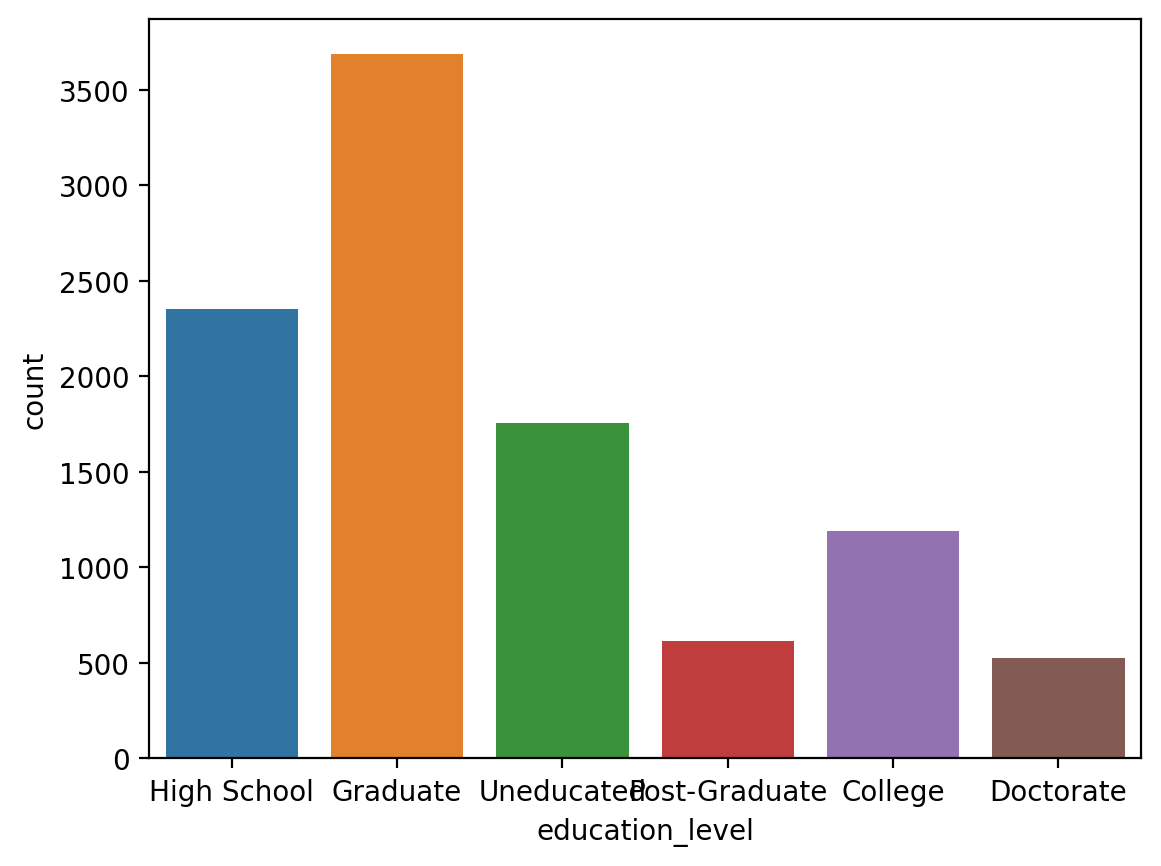

<AxesSubplot:ylabel='Frequency'>

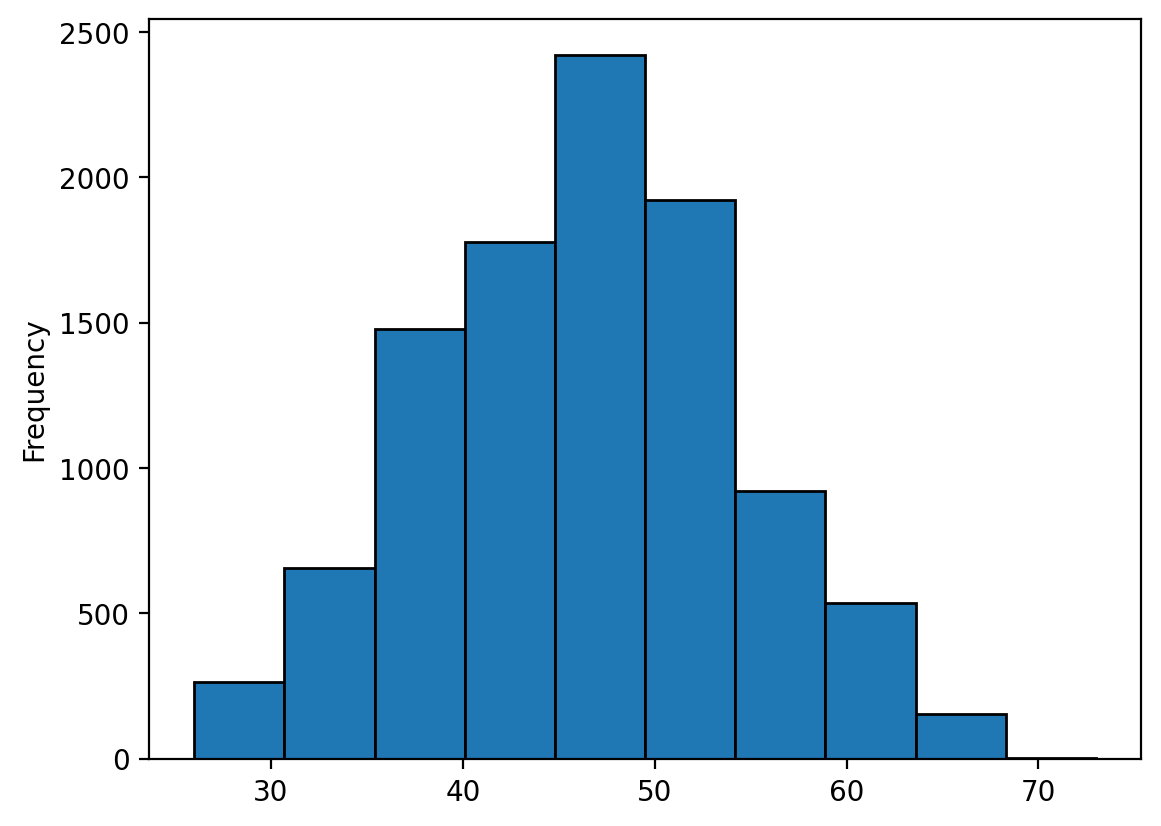

In [19]:
customers['age'].plot(kind='hist', edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

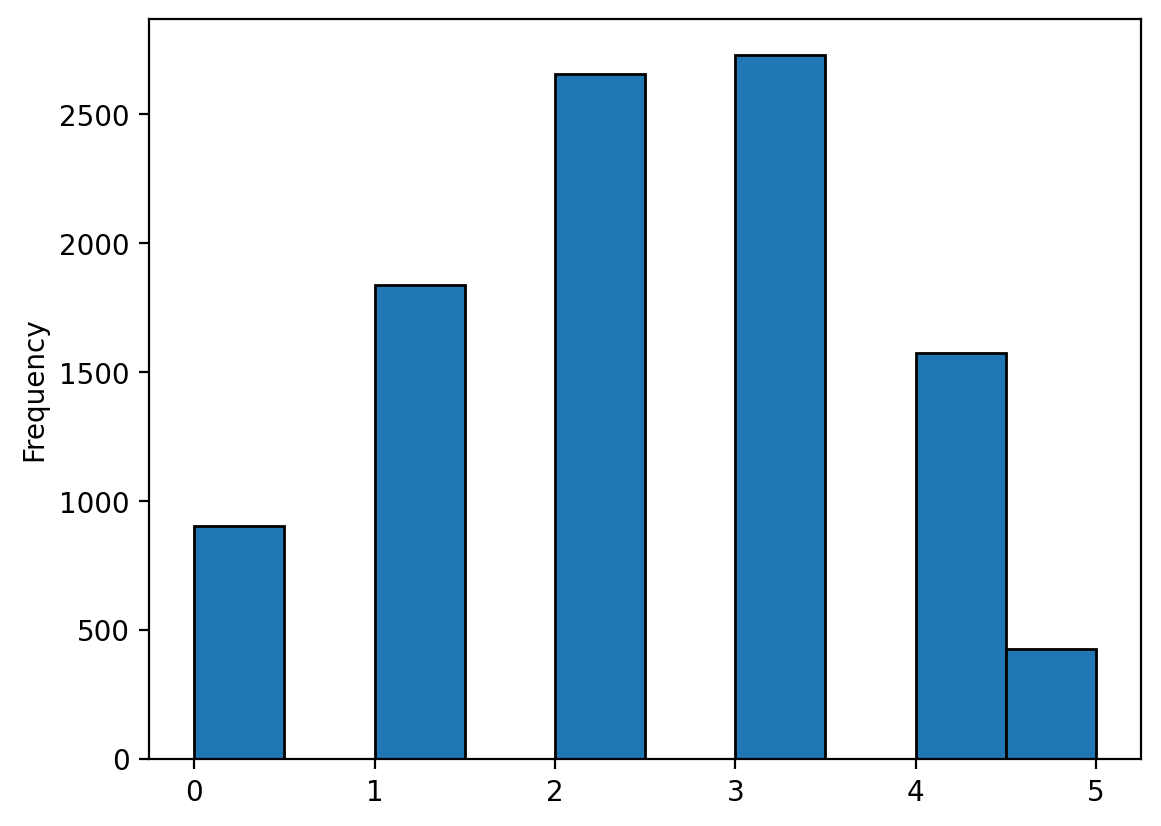

In [20]:
customers['dependent_count'].plot(kind='hist', edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

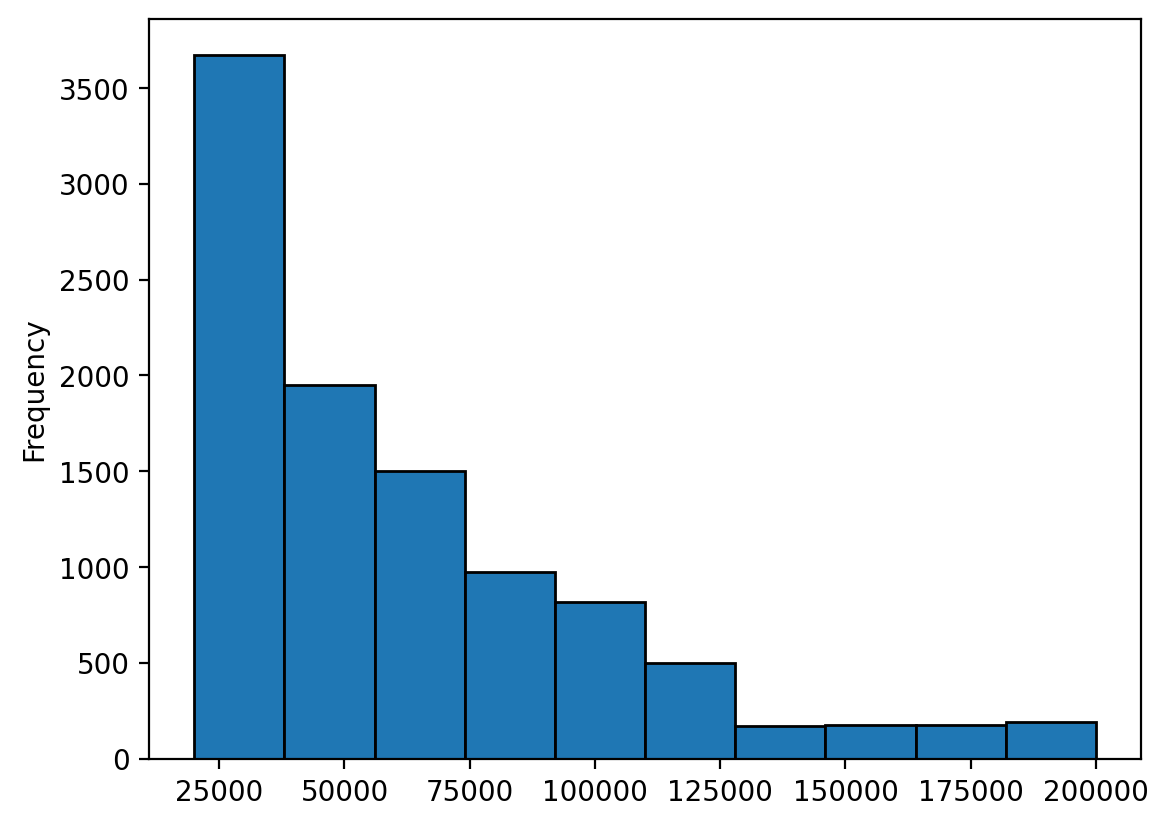

In [21]:
customers['estimated_income'].plot(kind='hist', edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

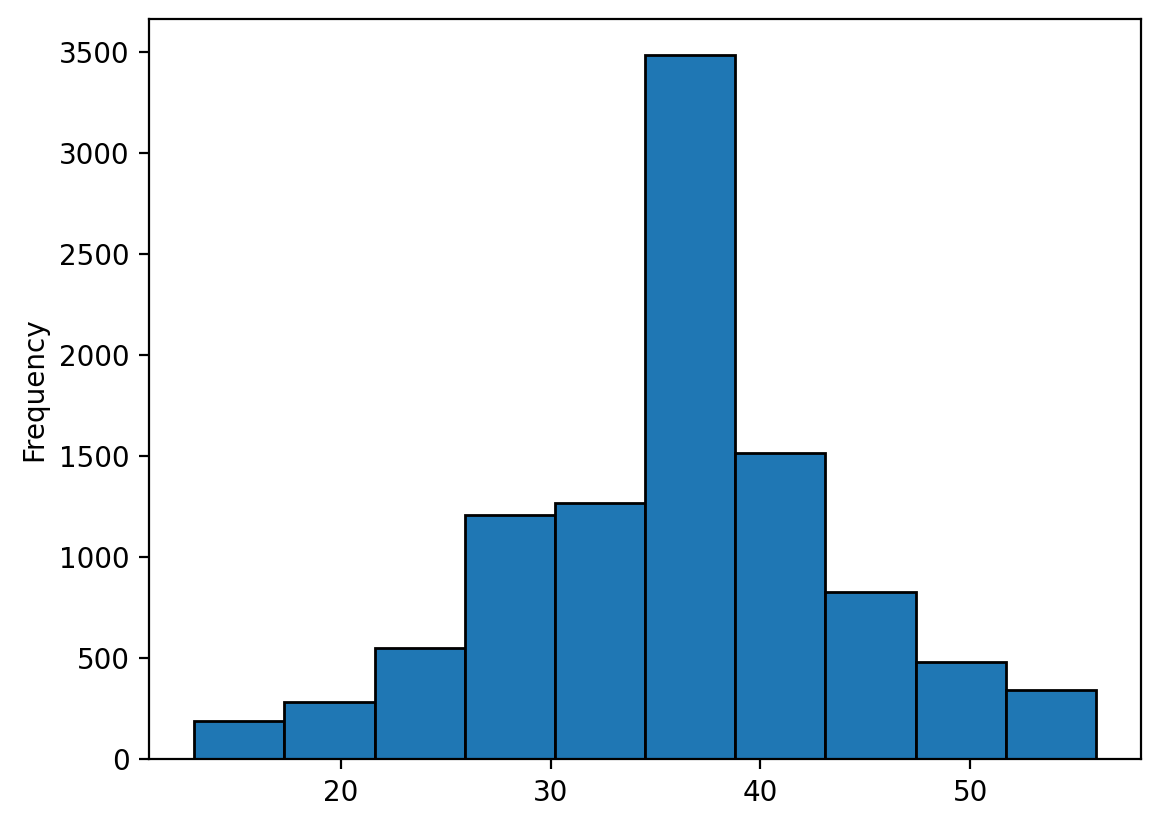

In [22]:
customers['months_on_book'].plot(kind='hist', edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

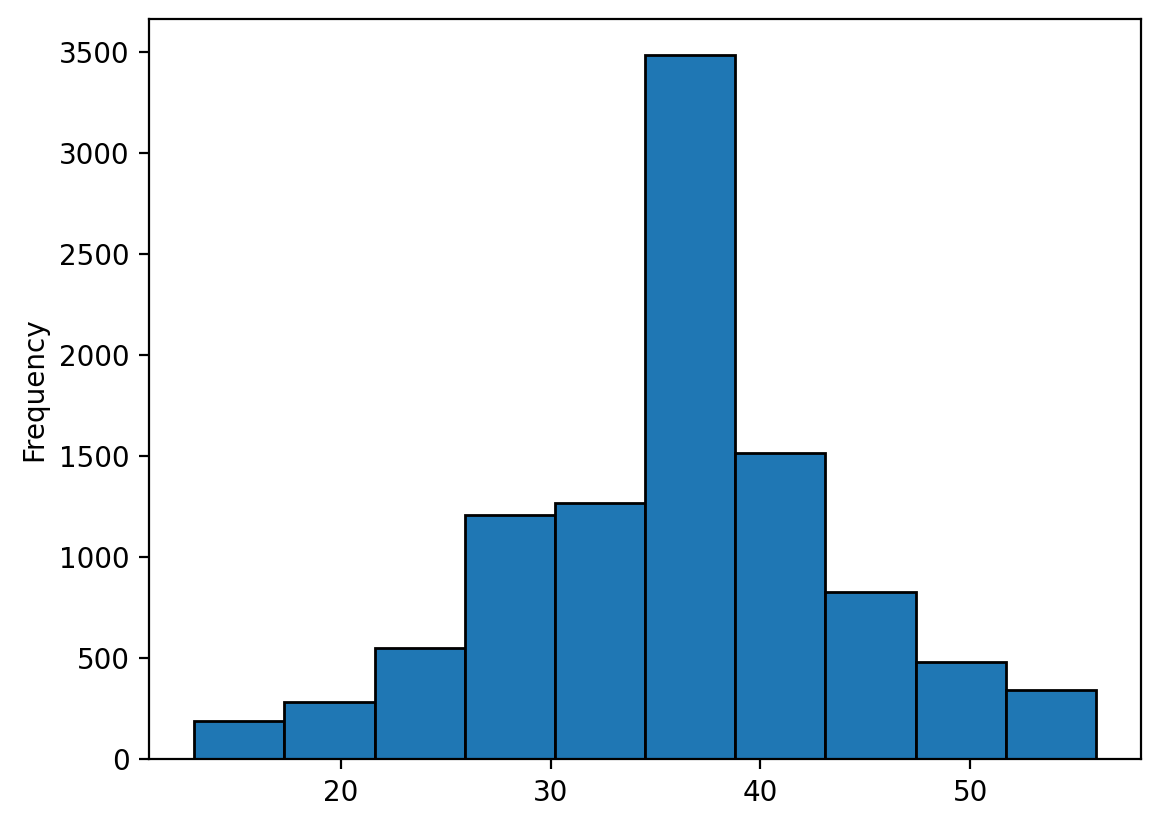

In [23]:
customers['months_on_book'].plot(kind='hist', edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

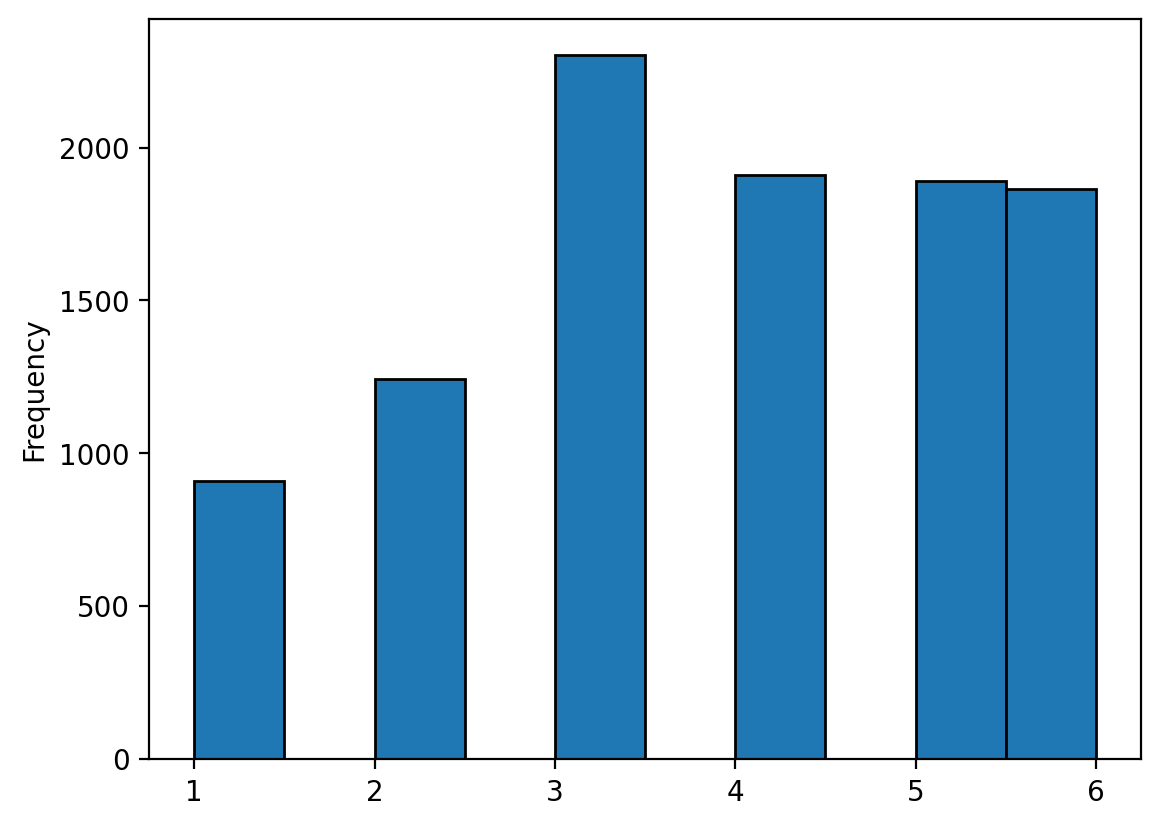

In [24]:
customers['total_relationship_count'].plot(kind='hist', edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

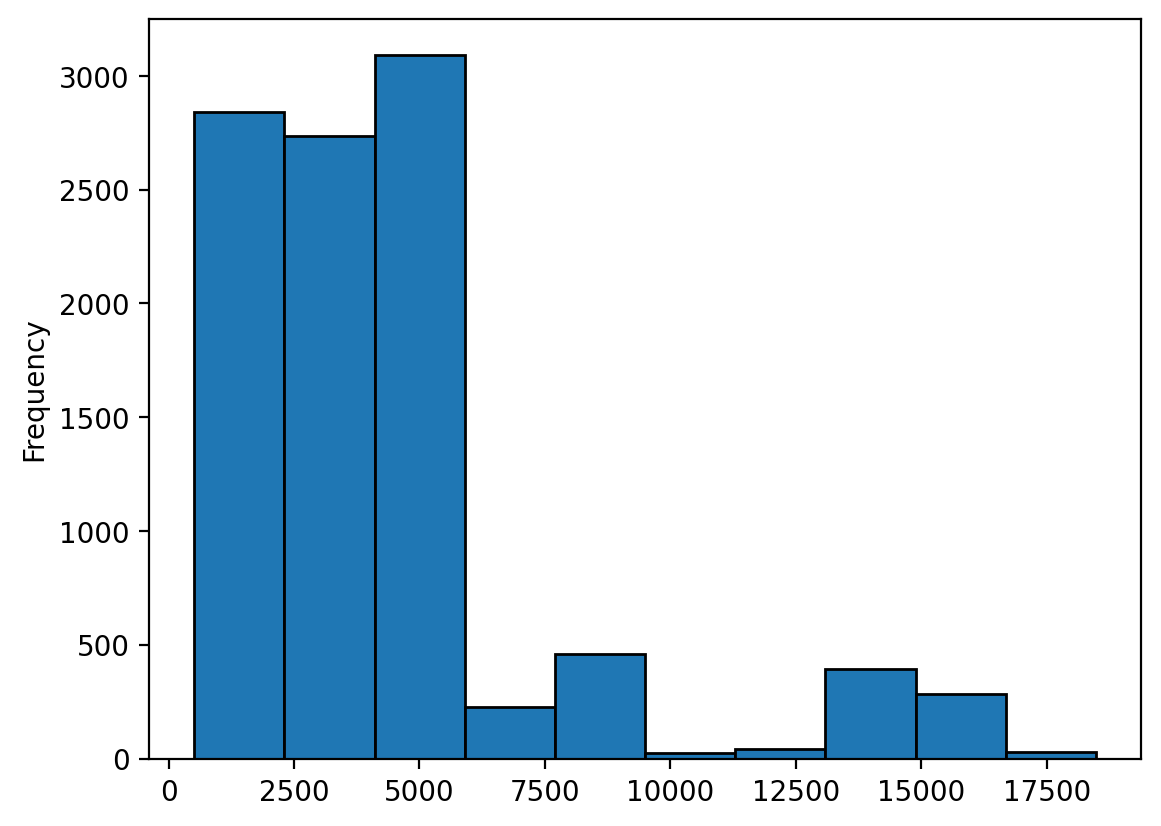

In [25]:
customers['total_trans_amount'].plot(kind='hist', edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

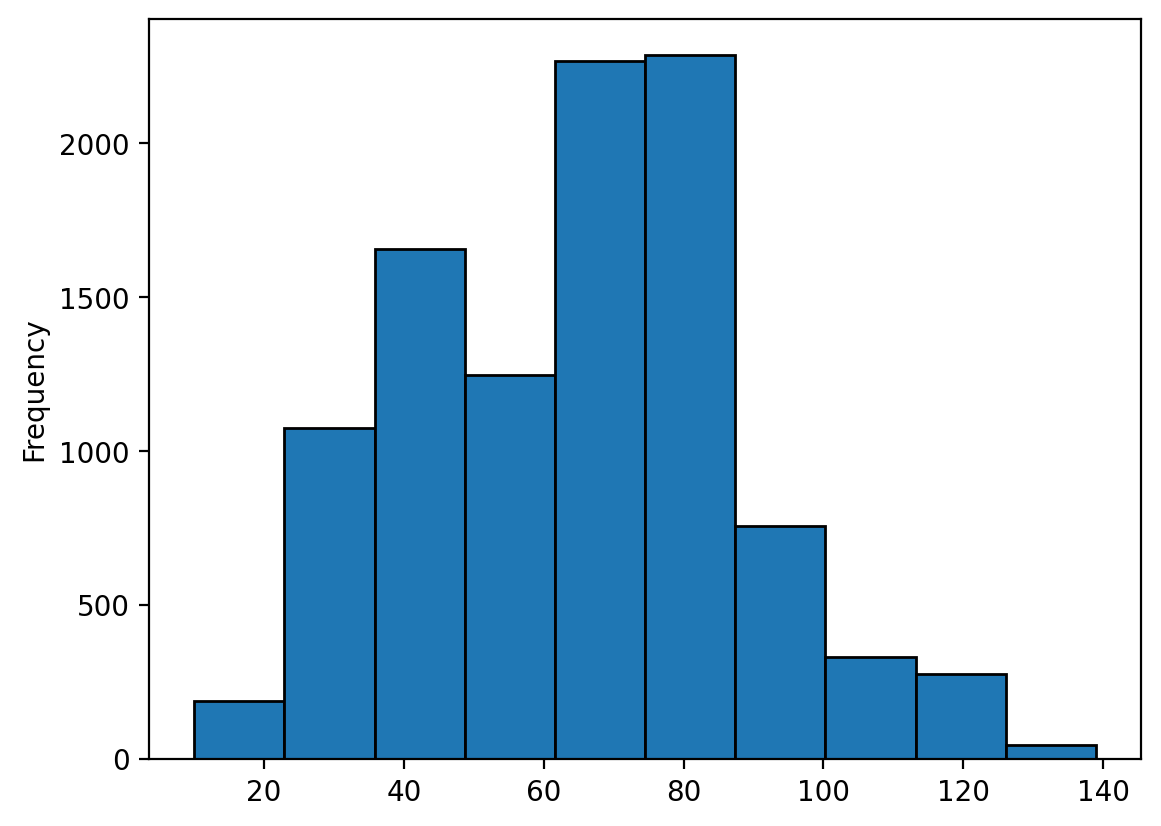

In [26]:
customers['total_trans_count'].plot(kind='hist', edgecolor='black')

<AxesSubplot:ylabel='Frequency'>

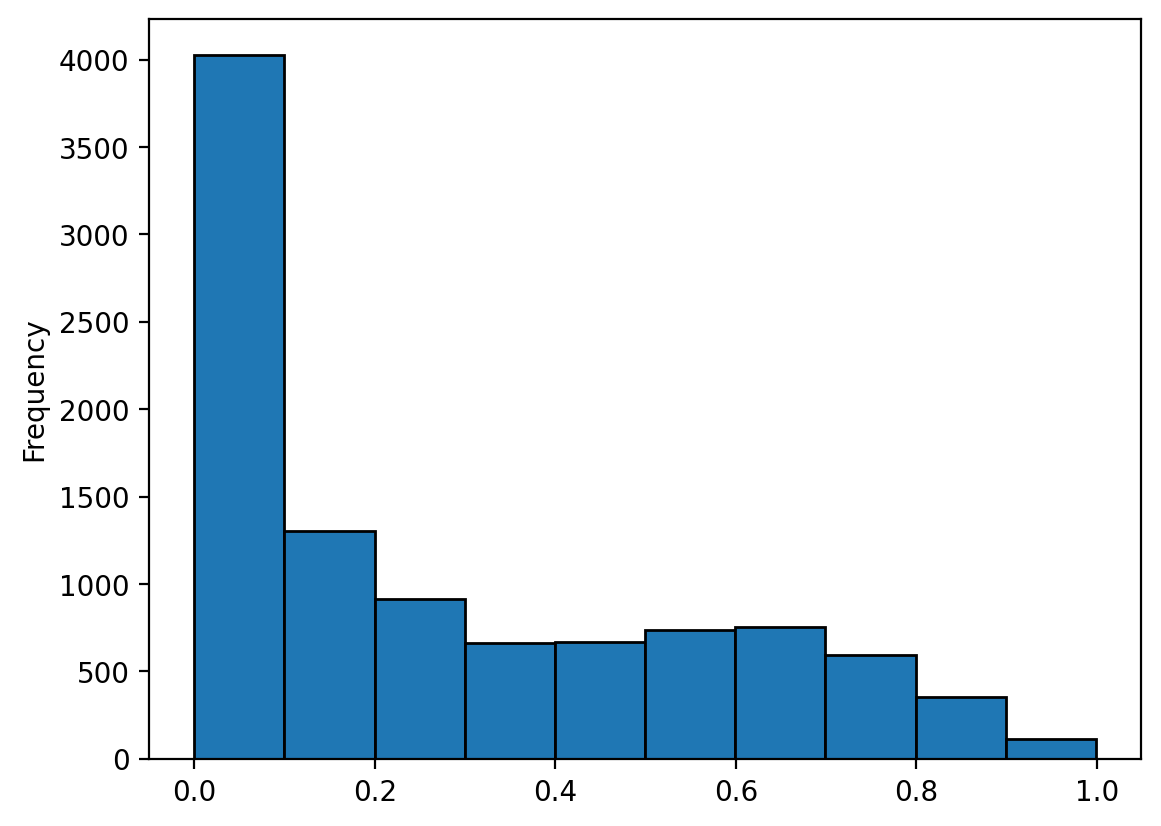

In [27]:
customers['avg_utilization_ratio'].plot(kind='hist', edgecolor='black')

In [34]:
customers2 = customers.copy()

Convert categorical column values to numerical:
gender column: 
M=1, F=0

education_level column:
Uneducated - 0
High School - 1
College - 2
Graduate - 3
Post-Graduate - 4
Doctorate - 5

In [35]:
customers2['gender']= customers2['gender'].map({'M': 1, 'F': 0})

In [32]:
customers['gender'].value_counts(normalize = True)

F    0.529081
M    0.470919
Name: gender, dtype: float64

In [36]:
customers2['gender'].value_counts(normalize = True)

0    0.529081
1    0.470919
Name: gender, dtype: float64

In [37]:
customers2['education_level'] = customers2['education_level'].map({'Uneducated':0,'High School':1, 'College':2, 'Graduate':3, 'Post-Graduate':4, 'Doctorate':5})

In [38]:
customers['education_level'].value_counts(normalize = True)

Graduate         0.363879
High School      0.232152
Uneducated       0.173299
College          0.117705
Post-Graduate    0.060827
Doctorate        0.052138
Name: education_level, dtype: float64

In [39]:
customers2['education_level'].value_counts(normalize = True)

3    0.363879
1    0.232152
0    0.173299
2    0.117705
4    0.060827
5    0.052138
Name: education_level, dtype: float64

In [40]:
marital_dummies=pd.get_dummies(customers2['marital_status'], drop_first=False)
customers2=pd.concat([customers2, marital_dummies], axis=1)

customers2=customers2.drop(columns='marital_status')
customers2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  int64  
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  int64  
 5   estimated_income          10127 non-null  int64  
 6   months_on_book            10127 non-null  int64  
 7   total_relationship_count  10127 non-null  int64  
 8   months_inactive_12_mon    10127 non-null  int64  
 9   credit_limit              10127 non-null  float64
 10  total_trans_amount        10127 non-null  int64  
 11  total_trans_count         10127 non-null  int64  
 12  avg_utilization_ratio     10127 non-null  float64
 13  Divorced                  10127 non-null  uint8  
 14  Marrie

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler=StandardScaler()
scaler.fit(customers2)
scaled_customers=scaler.transform(customers2)

scaled_customers

array([[ 0.8028781 , -0.16540558,  1.05995565, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [ 2.15686101,  0.33357038, -0.9434357 , ..., -0.92821381,
         1.2523374 , -0.28260887],
       [-0.68276854,  0.58305837,  1.05995565, ...,  1.07733799,
        -0.79850685, -0.28260887],
       ...,
       [-0.61437177, -0.29014957, -0.9434357 , ...,  1.07733799,
        -0.79850685, -0.28260887],
       [-0.58995843, -2.03656544,  1.05995565, ..., -0.92821381,
        -0.79850685,  3.53845931],
       [-0.67314507, -0.41489356, -0.9434357 , ...,  1.07733799,
        -0.79850685, -0.28260887]])

In [43]:
scaled_customers = pd.DataFrame(scaled_customers)

In [44]:
scaled_customers.head()

0         1         2         3         4         5         6   \
0  0.802878 -0.165406  1.059956  0.503368 -0.752211  0.175810  0.384621   
1  2.156861  0.333570 -0.943436  2.043199  0.662787 -0.967166  1.010715   
2 -0.682769  0.583058  1.059956  0.503368  0.662787  0.785397  0.008965   
3  0.832862 -0.789126 -0.943436  1.273283 -0.752211 -0.636973 -0.241473   
4 -0.814896 -0.789126  1.059956  0.503368 -1.459710  0.074212 -1.869317   

         7         8         9         10        11        12        13  \
0  0.763943 -1.327136  0.446622 -0.959707 -0.973895 -0.775882 -0.282405   
1  1.407306 -1.327136 -0.041367 -0.916433 -1.357340 -0.616276 -0.282405   
2  0.120579 -1.327136 -0.573698 -0.740982 -1.911206 -0.997155 -0.282405   
3 -0.522785  1.641478 -0.585251 -0.951758 -1.911206  1.759686 -0.282405   
4  0.763943 -1.327136 -0.430877 -1.056263 -1.570365 -0.997155 -0.282405   

         14        15        16  
0  1.077338 -0.798507 -0.282609  
1 -0.928214  1.252337 -0.282609  
2  1.077338 -0.798507 -0.282609  
3 -0.928214 -0.798507  3.538459  
4  1.077338 -0.798507 -0.282609

In [45]:
inertia = []
clusters_num = 10
for i in range(1, clusters_num+1):
    model = KMeans(n_clusters = i+1)
    cluster = model.fit_predict(scaled_customers)
    inertia.append(model.inertia_)

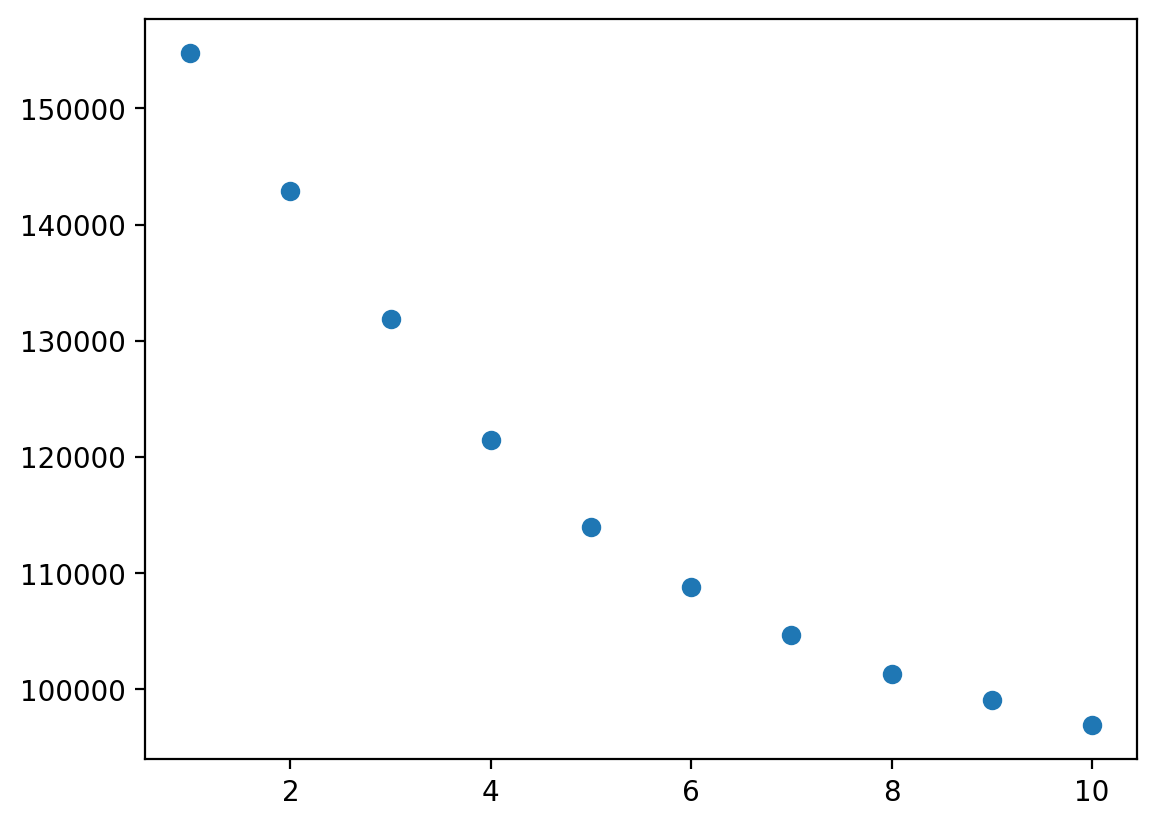

In [47]:
plt.pyplot.scatter(range(1,11),inertia, marker='o')

In [48]:
model_final = KMeans(n_clusters = 5)
cluster_final = model_final.fit_predict(scaled_customers)
print(cluster_final)

[1 2 1 ... 1 0 1]


In [52]:
customers['cluster']=cluster_final+1

In [50]:
import matplotlib.pyplot as plt

In [53]:
print(customers['cluster'].value_counts())

2    3721
3    3149
4    1762
1     748
5     747
Name: cluster, dtype: int64


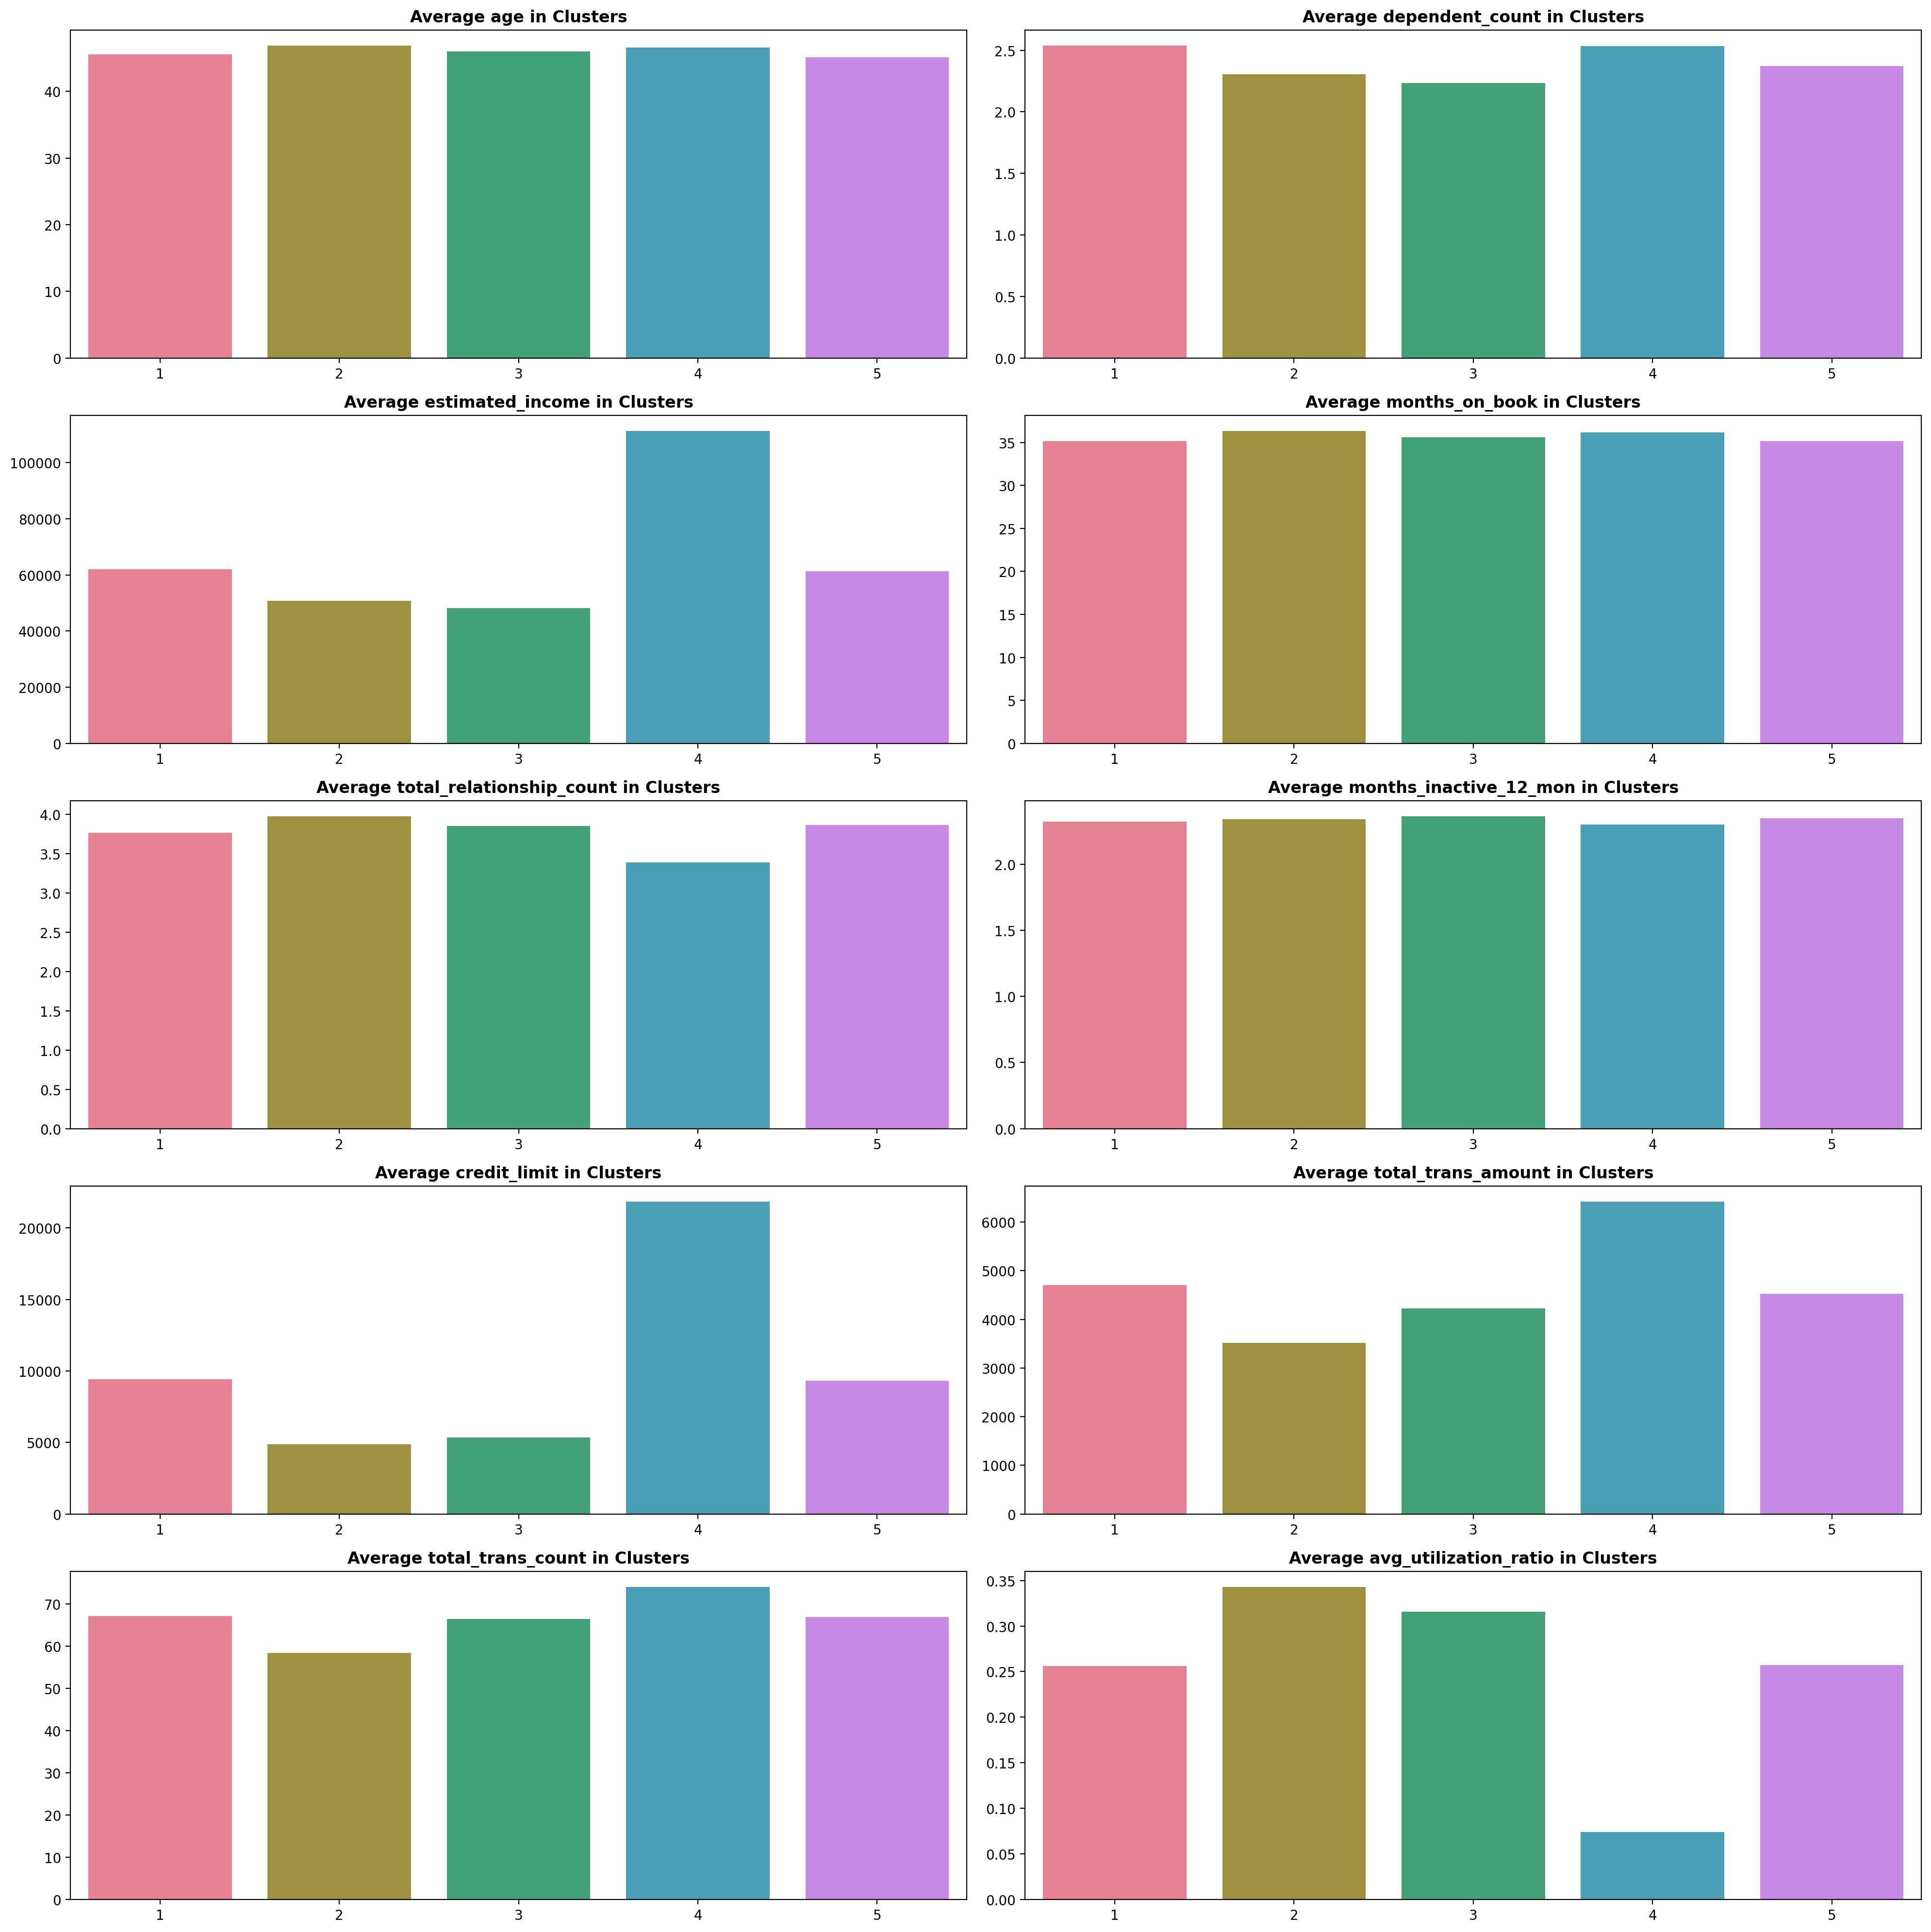

In [57]:
numeric_columns = customers.select_dtypes(include=np.number).drop(['customer_id', 'cluster'], axis=1).columns

plt.figure(figsize=(20,20))

for i, col in enumerate(numeric_columns):
    plt.subplot(5,2,i+1)
    p=sbn.barplot(data=customers, x='cluster', y=col,palette=sbn.color_palette("husl", 5), ci=None)
    plt.title(f'Average {col} in Clusters', weight='bold')
    plt.ylabel('')
    plt.xlabel('')
plt.tight_layout()   
plt.show()

<AxesSubplot:xlabel='estimated_income', ylabel='avg_utilization_ratio'>

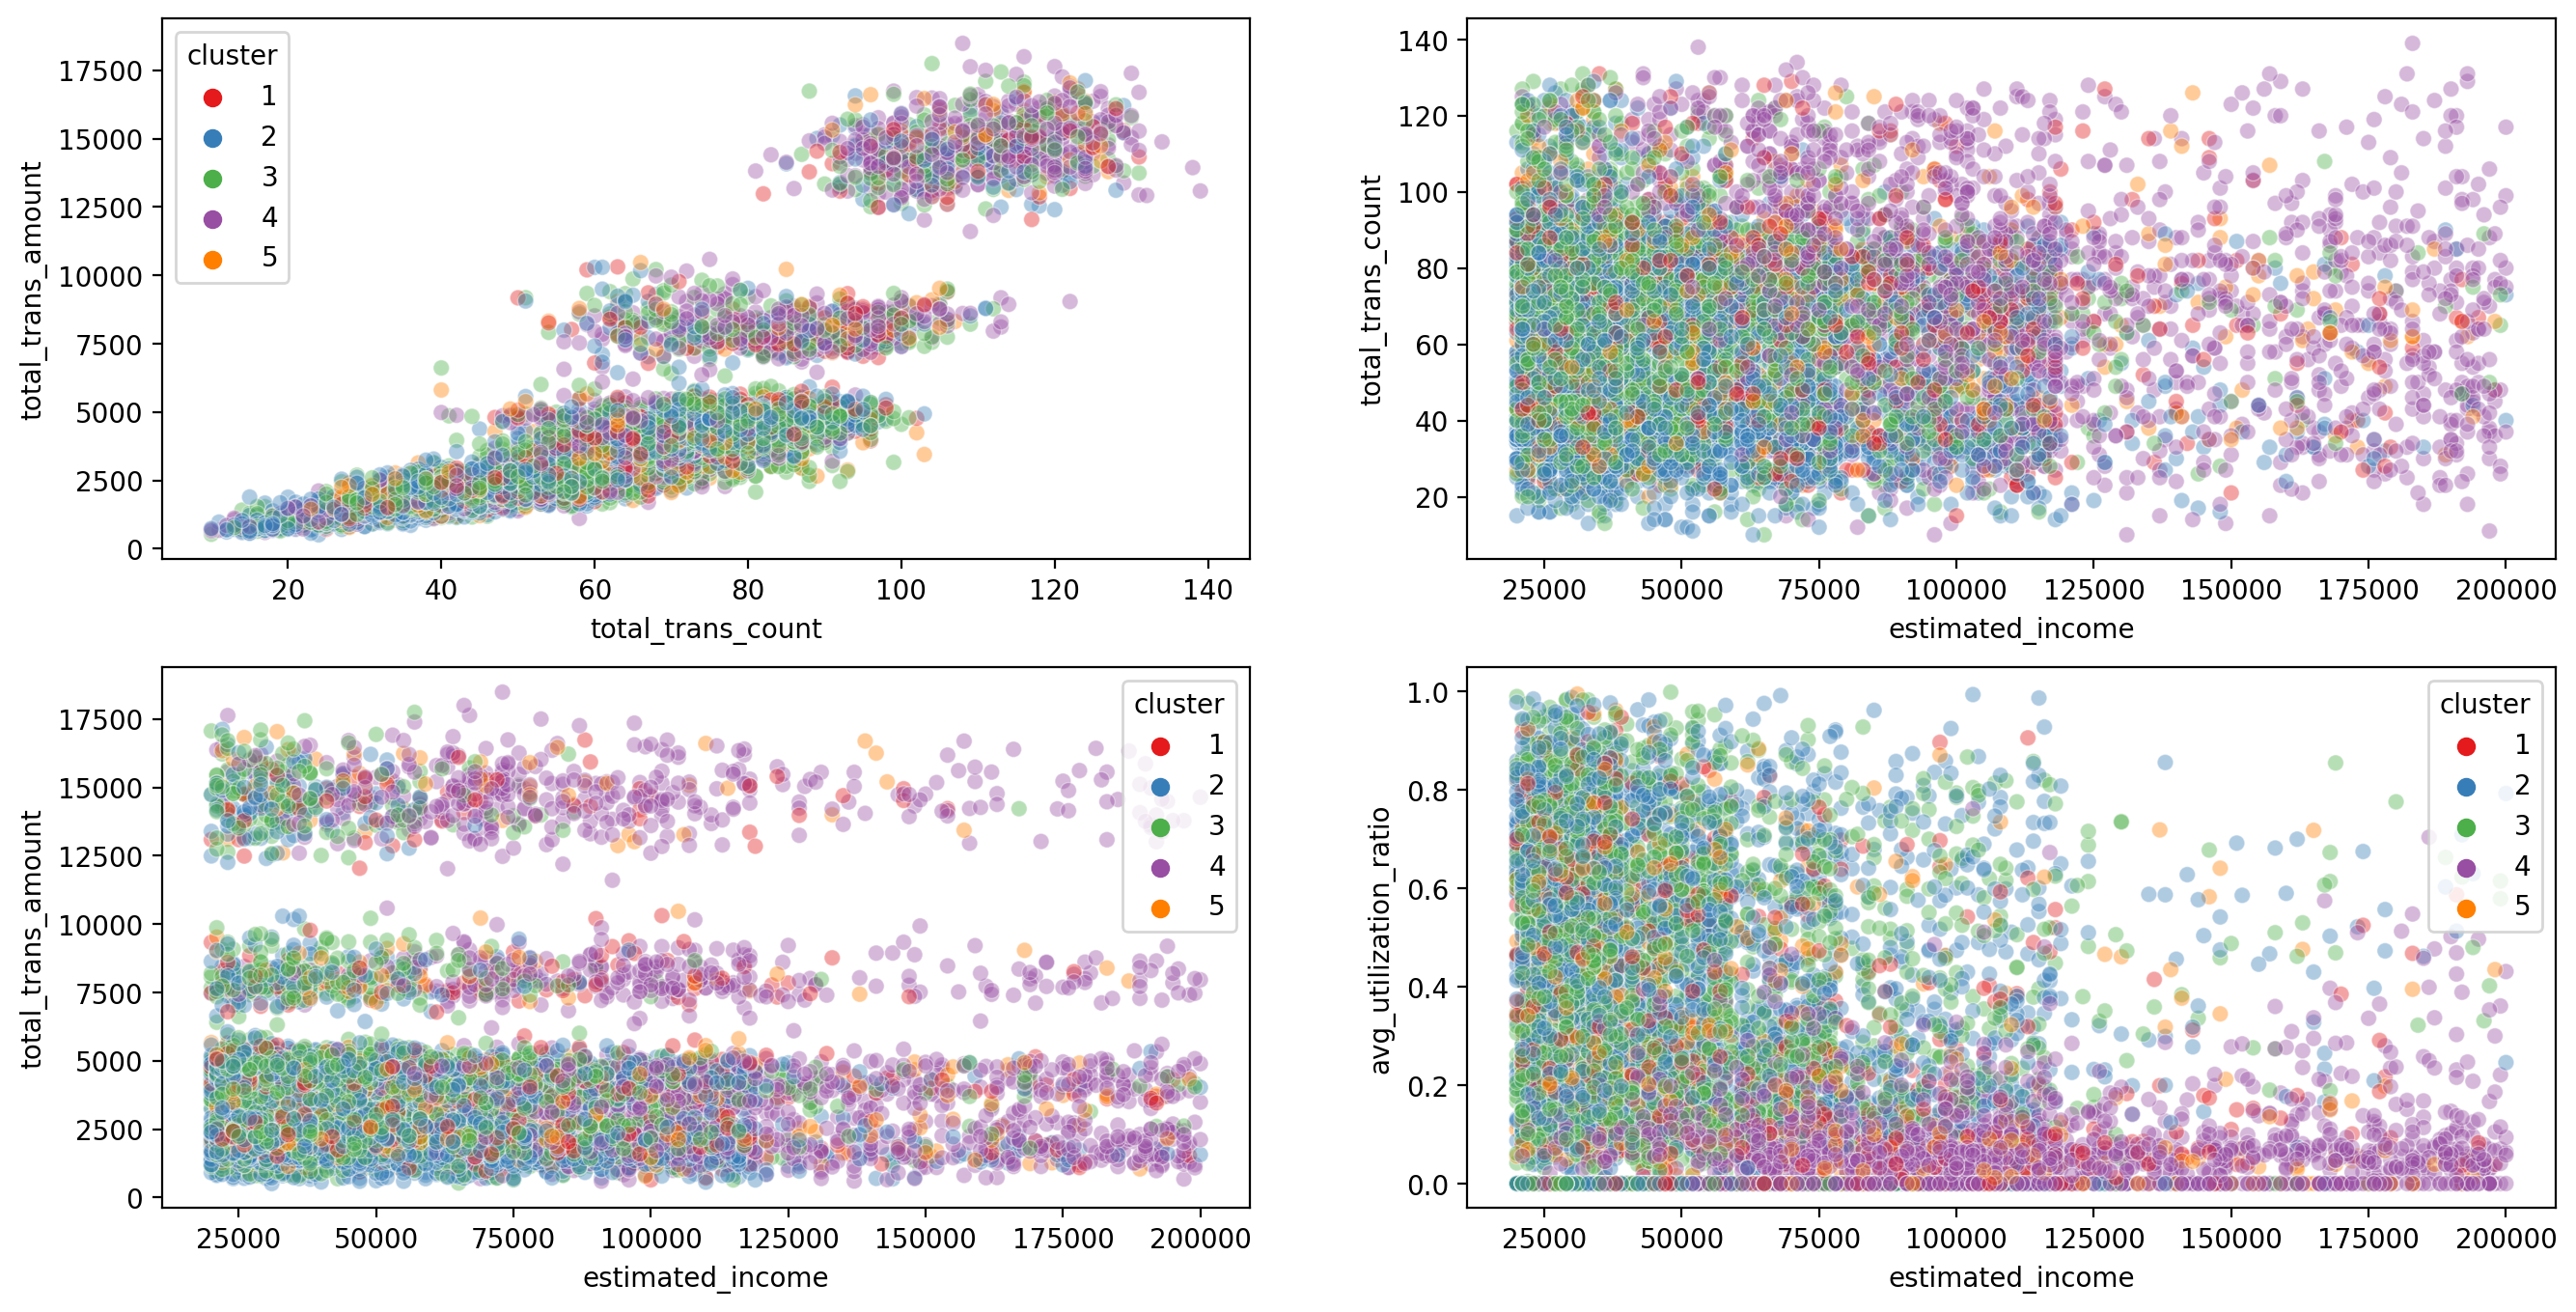

In [59]:
fig, axs = plt.subplots (2,2, figsize=(16, 8))

sbn.scatterplot(x='total_trans_count', y='total_trans_amount', hue='cluster', data=customers, palette='Set1', alpha=0.4, ax=axs[0][0])

sbn.scatterplot(x='estimated_income', y='total_trans_count', hue='cluster', data=customers, palette='Set1', alpha=0.4, ax=axs[0][1], legend=False)

sbn.scatterplot(x='estimated_income', y='total_trans_amount', hue='cluster', data=customers, palette='Set1', alpha=0.4, ax=axs[1][0])

sbn.scatterplot(x='estimated_income', y='avg_utilization_ratio', hue='cluster', data=customers, palette='Set1', alpha=0.4, ax=axs[1][1])


<AxesSubplot:xlabel='credit_limit', ylabel='avg_utilization_ratio'>

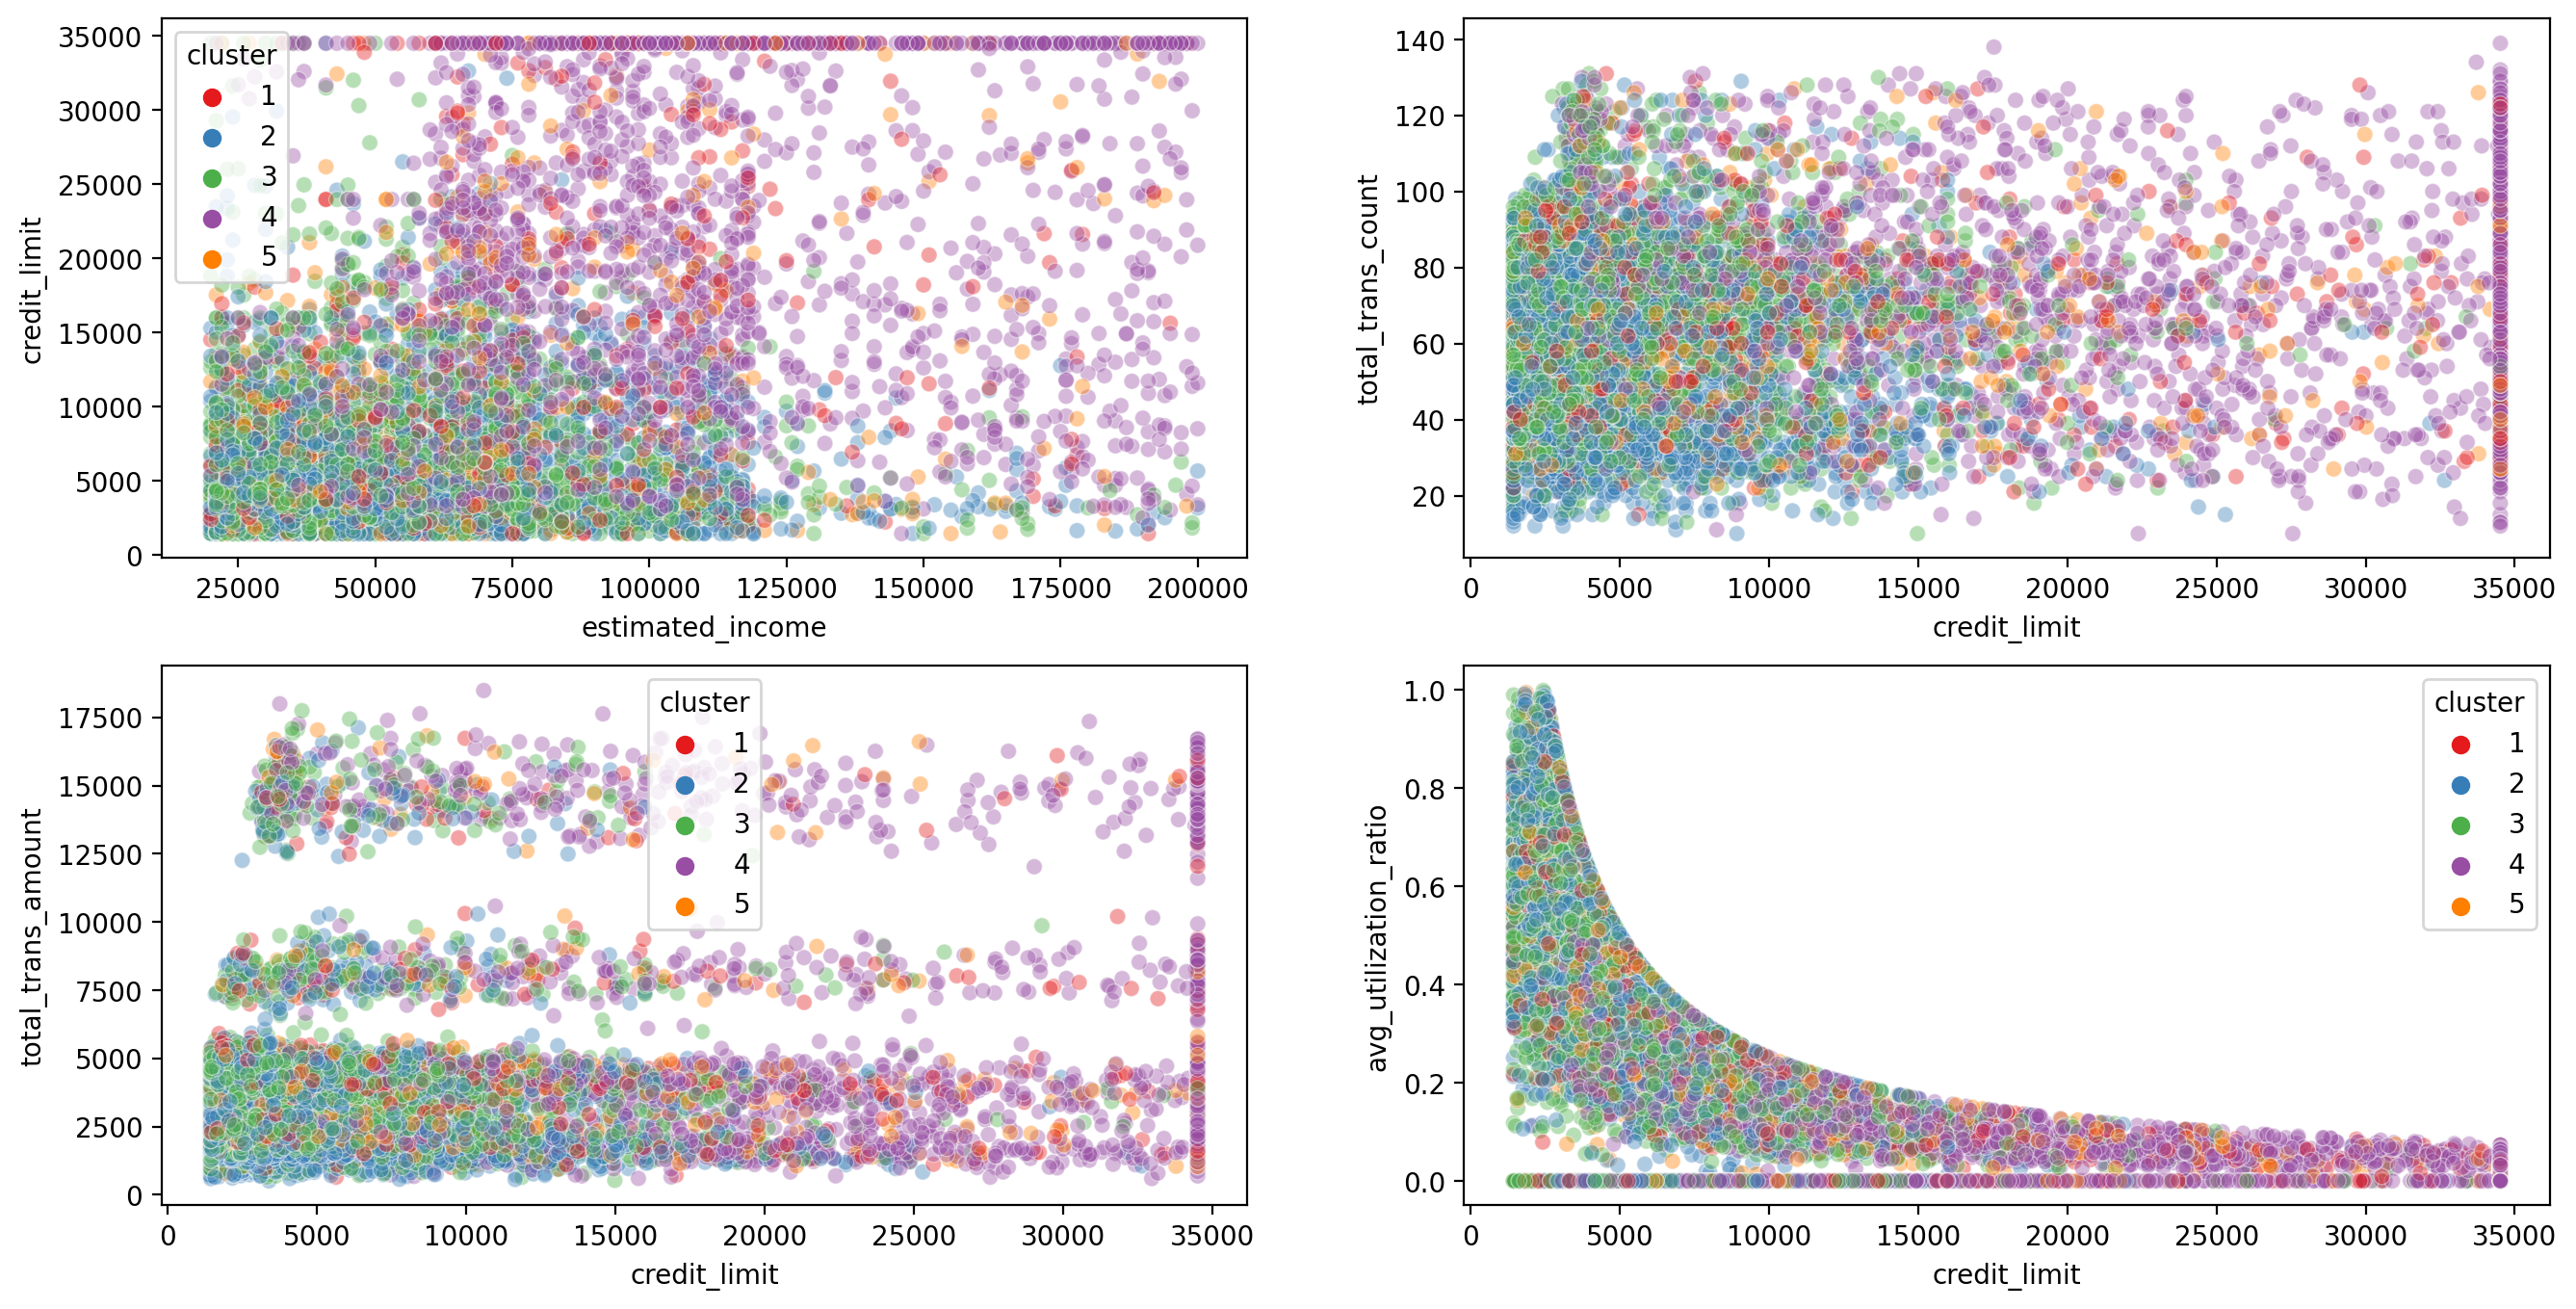

In [60]:
fig, axs = plt.subplots (2,2, figsize=(16, 8))

sbn.scatterplot(x='estimated_income', y='credit_limit', hue='cluster', data=customers, palette='Set1', alpha=0.4, ax=axs[0][0])

sbn.scatterplot(x='credit_limit', y='total_trans_count', hue='cluster', data=customers, palette='Set1', alpha=0.4, ax=axs[0][1], legend=False)

sbn.scatterplot(x='credit_limit', y='total_trans_amount', hue='cluster', data=customers, palette='Set1', alpha=0.4, ax=axs[1][0])

sbn.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='cluster', data=customers, palette='Set1', alpha=0.4, ax=axs[1][1])


In [ ]:
plot_gender = pd.crosstab(
  index=customers['cluster'], columns=customers['gender'],
  values=customers['gender'], aggfunc='size', normalize='index')

plot_education = pd.crosstab(
  index=customers['cluster'], columns=customers['education_level'],
  values=customers['education_level'], aggfunc='size', normalize='index')

order=['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
plot_education = plot_education.reindex(columns=order)

plot_marital = pd.crosstab(
  index=customers['cluster'], columns=customers['marital_status'],
  values=customers['marital_status'], aggfunc='size', normalize='index')

names=['Gender of Customers in Clusters', 'Education Level of Customers in Clusters', 'Marital Status of Customers in Clusters']

for name, duck in zip(names,[plot_gender, plot_education, plot_marital]):
    duck.plot.bar(stacked=True,colormap='Paired')
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.title(name, weight='bold')
    plt.xlabel('')
    plt.show() 